In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

X, y = make_moons(n_samples=5000, noise=0.3)

<IPython.core.display.Javascript object>

Build a dataframe from our `X` and `y` components.  Name the columns `x1`, `x2`, and `y`.

In [3]:
# X[rows_to_pick, cols_to_pick]
# : is shorthand for gimme it all

<IPython.core.display.Javascript object>

In [4]:
df = pd.DataFrame({"x1": X[:, 0], "x2": X[:, 1], "y": y})
df.head()

,x1,x2,y
0,1.476497,-0.134840,1
1,-0.577851,0.719599,0
2,0.221473,1.050261,0
3,0.023378,0.671581,0
4,-0.134641,0.543572,0


<IPython.core.display.Javascript object>

Make a scatterplot of `x1` x `x2` colored by `y`.

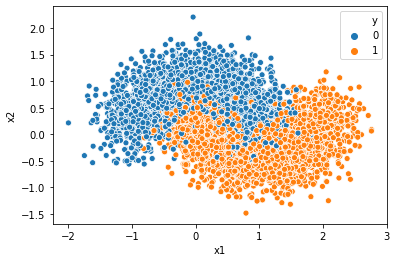

<IPython.core.display.Javascript object>

In [5]:
sns.scatterplot("x1", "x2", hue="y", data=df)
plt.show()

Perform a train/test split (use the original `X` and `y` for simplicity)
* Use 20% of the data for testing
* Stratify the split by your class labels to ensure equal proportions of both labels in train/test

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

<IPython.core.display.Javascript object>

## Linear SVM

* Build an SVM classifier with a linear kernel
* Print the train and test accuracy

In [7]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print(f"Train score: {train_score}")
print(f"Test score: {test_score}")

Train score: 0.8485
Test score: 0.85


<IPython.core.display.Javascript object>

In [8]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[423,  77],
       [ 73, 427]])

<IPython.core.display.Javascript object>

* Plot the decision boundary

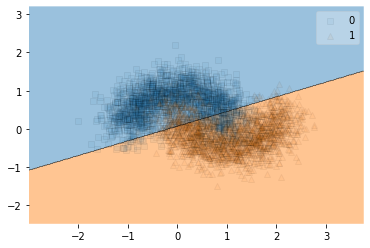

<IPython.core.display.Javascript object>

In [9]:
plot_decision_regions(X_train, y_train, clf=model, scatter_kwargs={"alpha": 0.05})
plt.show()

## Polynomial SVM

* Build an SVM classifier with a poly kernel
* Print the train and test accuracy
* Plot the decision boundary

Train score: 0.8675
Test score: 0.867


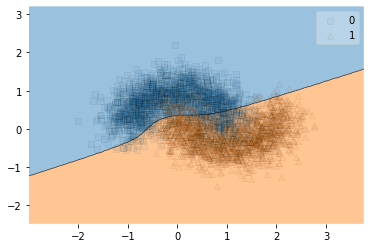

<IPython.core.display.Javascript object>

In [10]:
model = SVC(kernel="poly")
model.fit(X_train, y_train)

print(f"Train score: {model.score(X_train, y_train)}")
print(f"Test score: {model.score(X_test, y_test)}")

plot_decision_regions(X_train, y_train, clf=model, scatter_kwargs={"alpha": 0.05})
plt.show()

In [11]:
y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[409,  91],
       [ 42, 458]])

<IPython.core.display.Javascript object>

Loop through varying degrees of polynomials and show the accuracy/plot for each.  This could be a use case for a function.  Because we want to redo the same process over and over.

An aside about `kwargs`.  This abbrevation stands for **K**ey **W**ord **ARG**ument**S**.  If you want your function to accept a lot of different arguments, but you don't want to limit them you might use `kwargs`.  In this case of our function.  We want to pass keyword arguments to the model.  Inside the function, we'll print these out and see that they end up as a dictionary in the function.  We then use a double asterisk to pass the functions to our model.

In [12]:
def svm_fit_score_plot(**kwargs):
    print(kwargs)

    model = SVC(**kwargs)
    model.fit(X_train, y_train)

    print(f"\nTrain score: {model.score(X_train, y_train)}")
    print(f"Test score: {model.score(X_test, y_test)}")

    plot_decision_regions(X_train, y_train, clf=model, scatter_kwargs={"alpha": 0.05})
    plt.show()

<IPython.core.display.Javascript object>

Complete the `for` loop to pass each value of `degrees` to our custom function.

{'kernel': 'poly', 'degree': 1}

Train score: 0.8485
Test score: 0.85


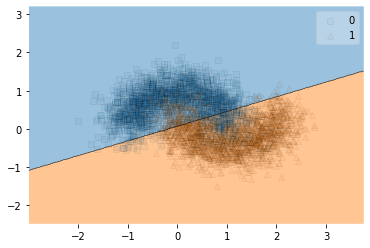

{'kernel': 'poly', 'degree': 2}

Train score: 0.714
Test score: 0.705


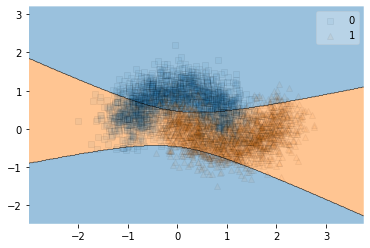

{'kernel': 'poly', 'degree': 5}

Train score: 0.8605
Test score: 0.867


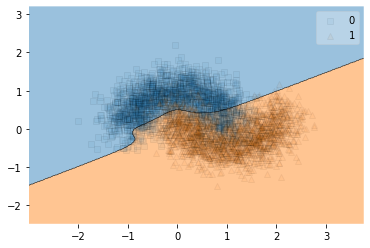

{'kernel': 'poly', 'degree': 10}

Train score: 0.6725
Test score: 0.664


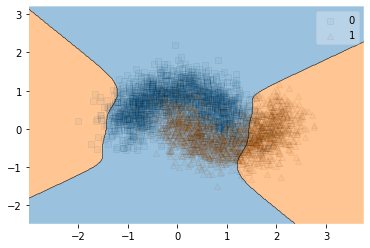

<IPython.core.display.Javascript object>

In [13]:
degrees = [1, 2, 5, 10]
for degree in degrees:
    svm_fit_score_plot(kernel="poly", degree=degree)

If we didn't care about plotting a better solution than our function would be to use [`GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) from `sklearn`.

* Define a dictionary named `grid` with the key as `"degree"` and the value as a list of values: 1, 2, & 5.
* Create a `GridSearchCV` object with `SVC` using the `"poly"` `kernel`
* Fit the model to your training data

In [14]:
grid = {"degree": [1, 2, 5], "C": [0.1, 1, 10]}
model = GridSearchCV(SVC(kernel="poly"), grid, verbose=1, cv=5)
model.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    6.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10], 'degree': [1, 2, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

<IPython.core.display.Javascript object>

With the `verbose` option we see that a total of `15` models were fit.  This number is specifically from the `Fitting 5 folds for each of 3 candidates` verbage.  This means we did 3 different models (the number of degree options we gave the model) and we fit each of these models 5 times (1 per fold, aka a new train/test split 5 times).

The parameters that led to the average accuracy on each of these test sets is stored in the `best_params_` attribute.  In this case, we see that a polynomial of degree 1 is the most accurate. A polynomial of degree one is a line.  So all we did was a fancy linear kernel.

In [15]:
model.best_params_

{'C': 1, 'degree': 1}

<IPython.core.display.Javascript object>

We know of a another hyperparameter though, `C`.   We can add this to our `GridSearchCV` to evaluate the best combination of `C` and `degree`.  This adds a lot more models to build.  This is something to consider when grid searching.  We added 3 values for `C` so this triples the number of models to be fit (1 new model for each combination of `degree` and `C`.

* Add `C` to our parameters dictionary with the values `0.1`, `1`, `10`
* Re-run the grid search with these parameter options
* Print out the best parameters.

In [16]:
grid = {"degree": [1, 2, 3, 4, 5], "C": [0.1, 1, 10]}

model = GridSearchCV(SVC(kernel="poly"), grid, verbose=1)
model.fit(X_train, y_train)

model.best_params_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:   11.5s finished


{'C': 1, 'degree': 3}

<IPython.core.display.Javascript object>

Hey, we're not linear anymore.  Let's view this new decision boundary. With our custom function.

{'kernel': 'poly', 'C': 1, 'degree': 3}

Train score: 0.8675
Test score: 0.867


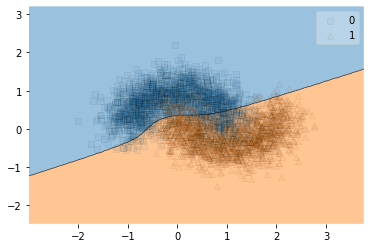

<IPython.core.display.Javascript object>

In [17]:
C = model.best_params_["C"]
degree = model.best_params_["degree"]

svm_fit_score_plot(kernel="poly", C=C, degree=degree)

## RBF SVM (radial basis function)

* Build an SVM classifier with a rbf kernel
* Print the train and test accuracy
* Plot the decision boundary

Train score: 0.9115
Test score: 0.915


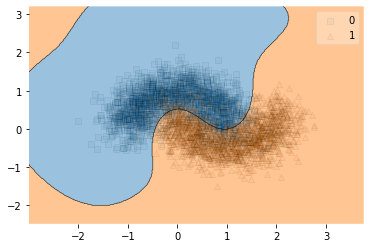

<IPython.core.display.Javascript object>

In [18]:
model = SVC(kernel="rbf")
model.fit(X_train, y_train)

print(f"Train score: {model.score(X_train, y_train)}")
print(f"Test score: {model.score(X_test, y_test)}")

plot_decision_regions(X_train, y_train, clf=model, scatter_kwargs={"alpha": 0.05})
plt.show()

Oooh, that's pretty and it works pretty well in comparison to other types.  Let's vary the value of `C` and see what happens.

* Define a list of c values using `0.1`, `1`, `10`, `100`
* Write a `for` loop to pass each of these values to our custom function (use the rbf kernel in each iteration.

{'kernel': 'rbf', 'C': 0.1}

Train score: 0.908
Test score: 0.91


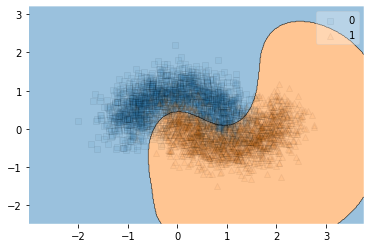

{'kernel': 'rbf', 'C': 1.0}

Train score: 0.9115
Test score: 0.915


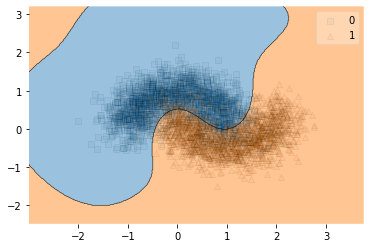

{'kernel': 'rbf', 'C': 10.0}

Train score: 0.91225
Test score: 0.915


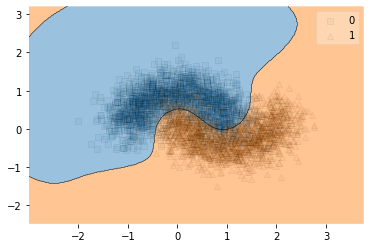

{'kernel': 'rbf', 'C': 100.0}

Train score: 0.912
Test score: 0.913


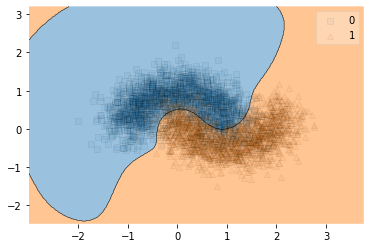

<IPython.core.display.Javascript object>

In [19]:
cs = [0.1, 1.0, 10.0, 100.0]
for c in cs:
    svm_fit_score_plot(kernel="rbf", C=c)

The shape of our decision regions changes pretty drastically, but our accuracy doesn't.  This is where the principle of parsimony should come into play.  The simpler the model the better.  `C` is essentially a measure of how complex the model is.  So if you have models with similar accuracy, in general, you should choose the simpler model (in this case we would choose the lower value of `C` unless a higher value shows to perform way better).

## Grid Search all the things

What's the best `kernel`, `degree`, `C`?  We've seen a grid search for `degree` and `C`.  We can add `kernel` to this search as well.

* Add `kernel` to our grid search `params` dictionary; use every kernel we've looked at in this notebook
* Perform the grid search
* Print the best parameters

In [20]:
grid = {"kernel": ["rbf", "linear", "poly"], "degree": [1, 3, 5], "C": [1, 10, 100]}

model = GridSearchCV(SVC(), grid, verbose=1, cv=5)
model.fit(X_train, y_train)

model.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   28.6s finished


{'C': 100, 'degree': 1, 'kernel': 'rbf'}

<IPython.core.display.Javascript object>

135 models! That's a lot of work being done for us.  What's the best model with these parameter options?

* Pass in the best parameters to our custom function to `score` it and view the decision boundary

{'C': 1, 'kernel': 'rbf'}

Train score: 0.9115
Test score: 0.915


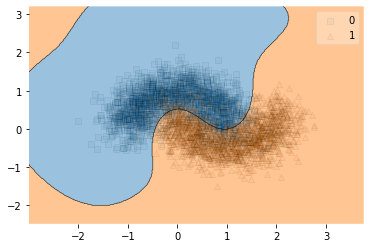

<IPython.core.display.Javascript object>

In [21]:
svm_fit_score_plot(C=1, kernel="rbf")